# 1. Trabajo Práctico N°1: de Analisis + Visualización

## 1.1 Armado de Cono de Conversión y evolución de uso de un producto digital


### Introducción
En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo.

In [3]:
import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# some config
plt.rcParams['figure.figsize'] = (12, 9)

## Carga del dataset

In [5]:
traffic_data = pd.read_csv(
    'datasets/traffic_AR_CL_UY.csv', 
    usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], 
    parse_dates=True
)

Ejecutamos un breve  repaso exploratorio

In [6]:
traffic_data.head(10)

,Fecha,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
0,2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731
1,2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479
2,2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290
3,2019-03-01,cart,MLA,iOS,0,1179,856,671,622
4,2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856
5,2019-03-01,direct,MLA,Desktop,98263,93506,80994,63941,62256
6,2019-03-01,direct,MLA,Mobile,69273,65385,51310,35665,33229
7,2019-03-01,direct,MLA,iOS,29215,27378,23245,17899,16835
8,2019-03-01,direct,MLC,Desktop,14970,14818,12629,10444,9827
9,2019-03-01,direct,MLC,Mobile,14840,14695,11084,8567,7445


In [7]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7709 entries, 0 to 7708
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     7709 non-null   object
 1   flow      7709 non-null   object
 2   Site      7709 non-null   object
 3   Device    7709 non-null   object
 4   Loading   7709 non-null   int64 
 5   Shipping  7709 non-null   int64 
 6   Payments  7709 non-null   int64 
 7   Review    7709 non-null   int64 
 8   Congrats  7709 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 542.2+ KB


### Descripción de variables

Para describir el comportamienot de los usuarios usaremos 3 variales utilizadas como "indice compuesto"
- **Fecha**
- **flow**
- **Site**
- **Device**

| Nombre   |  Tipo  | Formato      | Descripción |
|:---------|:-------|:------------:|:------------|
| *Fecha   |  Date  |  YYYY-MM-DD  | Los valores corresponde a los eventos registrados durante este día |
| *flow    | String |  direct-cart | Define si el flujo corresponde a compra directa o de carrito      |
| *Site    | String |     XXX      | Describe el site al que corresponden las sesiones   |
| *Device  | String |              | Define el dispositivo donde se ejecuto el flujo de compra |
| Loading  | Entero |              | Cantidad de sesiones que vieron el paso de Loading  |
| Shipping | Entero |              | Cantidad de sesiones que vieron el paso de Shipping |
| Payments | Entero |              | Cantidad de sesiones que vieron el paso de Payments |
| Review   | Entero |              | Cantidad de sesiones que vieron el paso de Review   |
| Congrats | Entero |              | Cantidad de sesiones que vieron el paso de Congrats |

**Observaciones:**
- **Loading**
- **Shipping**
- **Payments**
- **Review**
- **Congrats**


# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio de __las observaciones__ del dataset.

Se sugiere explorar las series de forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que nos ayude a modelar las series y hacer pronósticos.

Como los valores observados se indizan en relación al tiempo, este tipo de datos se conocen como __series temporales__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 
El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

   
Para los siguientes puntos elija:
1. Un site por analizar
2. Un tipo de flujo de compra ( compra directa versus modo carrito )
3. Dos plataformas ( Se sugiere tomar una Web Desktop o Mobile y otra de las applicaciones Android o iOS ej: Desktop vs Android )
4. De necesitarlo necesitará resamplear los valores a nivel de día como mínimo
5. Una vez ejecutado los pasos anterioes debería contar con 2 series temporales ( y no todo el dataset ) referidas al mismo pais pero en 2 plataformas diferentes.

Se proponen las siguientes actividades:

- Determine el tipo de variables y el período de tiempo bajo análisis

- Indague sobre la existencia de valores faltantes.  

- ¿Cómo trataría a los faltantes? ¿Por qué? (El tratamiento de valores faltantes será parte del 
    práctico de curación y pueden omitirlos, en caso de necesitar inputar valores pueden tomar periodos que ls omitan )
 

- Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). Puede derivar alguna afirmación del análisis de los coeficientes de asimetría y kurtosis

- ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

- Seleccione una serie temporal de las anteriores y grafique un boxplot para cada mes. 
  - ¿Se mantiene inalterada en el tiempo la distribución?

- Una buena forma de explorar la evolución y efectividad de este tipo de productos digitales es armar **un cono de conversion**, que es un histograma donde cada columna es un paso del flujo y refleja el total de sesiones acumulada en el paso durante un periodo de timepo dado
    - La idea es poder refresentar el cono de conversion parecida a la inferior 
    - Usaremos los pasos de Shipping hasta Congrats ( podemos obviar Loading )
    - Basandose en lo anterior podría afirmar que una plataforma es más eficiente que otra ( más sessiones al final del cono de conversion )

![Cono de conversion](assets/ConoDeConversion.png)

- Estudie la evolución temporal de las observaciones. 
  - ¿En qué sentido tienden a moverse? 
  - ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Podría asociarlos a eventos?
  - ¿Coinciden con las noticias? 
  - ¿Los índices tienden a moverse en forma conjunta?  

- Investigue si las observaciones tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?

![Cono de conversion](assets/Evolucion.png)

- **Extra Mile**
    - Seleccione un serie de referencia y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita con valores de retardo hasta 7 periodos
 
    - Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [INTRO a ACF PACF](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación


Para la ejecución de los ultimos puntos tambienpuede basarse en las siguientes referencias

[ Visualizaciones de series temporales ](https://learnpython.com/blog/python-data-visualization-pandas-matplotlib/)

[ Visualización y Analisis de Series Temporales ]( https://kanoki.org/2020/04/27/time-series-analysis-data-visualization/ )

## Fecha de entrega

- __Versión preliminar: __ 

- __Version final: __

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. 
El mismo debe estar pensado para un público técnico pero que desconoce lel dominio del problema a resolver tal como los compañeros de clase. 

Dicho informe puede ser un notebook, la condición de que en el mismo se efectúe un análisis escrito que permita describir y trasmitir las conclusiones a traves de las visualizaciones

## Snippets y recortes útiles para arrancar rápido

In [8]:
# Filter values by  site, flow, and platform 
# https://medium.com/swlh/3-ways-to-filter-pandas-dataframe-by-column-values-dfb6609b31de

filtered = traffic_data.loc[
    ( traffic_data["flow"] == "direct"    ) &  
    ( traffic_data["Site"] == "MLA"       ) & 
    ( traffic_data["Device"] == "Android" ) 
]

# setting first name as index column
filtered.set_index("Fecha", inplace = True)

<AxesSubplot:xlabel='Fecha'>

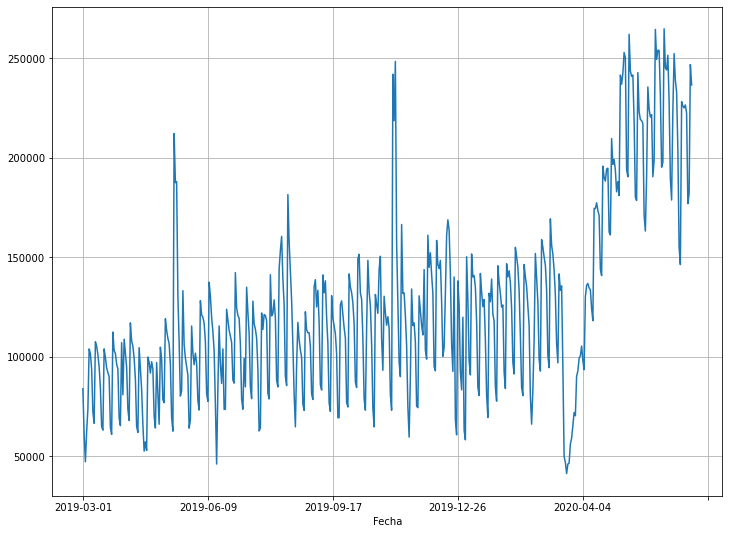

In [9]:

filtered['Congrats'].plot(grid = True)

<AxesSubplot:xlabel='Fecha'>

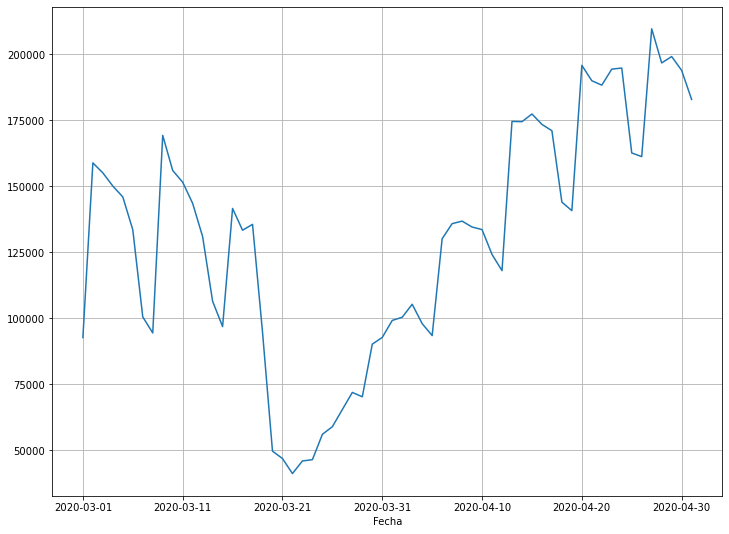

In [22]:
# Filtrar o definir un periodo de analisis puede hacerse con

# filtered.loc['2020-03-01':'2020-05-01']
filtered['2020-03-01':'2020-05-01']['Congrats'].plot(grid = True)